In [24]:
import pandas_datareader as rd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [21]:
# Get the stock quote
aapl = rd.DataReader('AAPL', data_source='yahoo', start='1980-01-01', end='2021-01-01')
spy = rd.DataReader('spy', data_source='yahoo', start='1980-01-01', end='2021-01-01')

In [32]:
# Merging the data
joined = pd.merge(aapl[['Close']], spy[['Close']], left_index=True, right_index=True).rename(columns={'Close_x':'AAPL', 'Close_y':'SPY500'})
joined['AAPL_ret'] = joined['AAPL'].pct_change(1)
joined['SPY500_ret'] = joined['SPY500'].pct_change(1)
joined

,AAPL,SPY500,AAPL_ret,SPY500_ret
Date,,,,
1993-01-29,0.531250,43.937500,NaN,NaN
1993-02-01,0.546875,44.250000,0.029412,0.007112
1993-02-02,0.537946,44.343750,-0.016327,0.002119
1993-02-03,0.535714,44.812500,-0.004149,0.010571
1993-02-04,0.531250,45.000000,-0.008333,0.004184
...,...,...,...,...
2020-12-24,131.970001,369.000000,0.007712,0.003890
2020-12-28,136.690002,372.170013,0.035766,0.008591
2020-12-29,134.869995,371.459991,-0.013315,-0.001908


In [35]:
# Get the return
aapl_ret = aapl.Close.pct_change(1).dropna().to_numpy().reshape(-1, 1)
spy_ret = spy.Close.pct_change(1).dropna().to_numpy().reshape(-1, 1)

y = joined['AAPL_ret'].dropna().to_numpy().reshape(-1, 1)
X = joined['SPY500_ret'].dropna().to_numpy().reshape(-1, 1)

# Alpha modeling
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [37]:
X_predict = np.linspace(X.min(), X.max()).reshape(-1, 1)
y_predict = model.predict(X_predict)

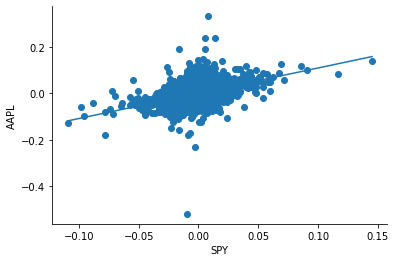

In [38]:
plt.scatter(X, y);
plt.xlabel('SPY');
plt.ylabel('AAPL');
plt.plot(X_predict, y_predict);

sns.despine()

In [43]:
beta = model.coef_
alpha = model.intercept_
print(f'Alpha of AAPL: {alpha[0]}')
print(f'Beta of AAPL: {beta[0][0]}')

Alpha of AAPL: 0.0007753689922875458
Beta of AAPL: 1.0875944701105307


In [45]:
joined[['AAPL_ret', 'SPY500_ret']].std()

AAPL_ret      0.027932
SPY500_ret    0.011923
dtype: float64

In [46]:
# Volitility == std
joined['AAPL_ret'].std() / joined['SPY500_ret'].std()

2.3426289419372917